In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
import tensorflow as tf

In [4]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

# Read the CSV

In [5]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [7]:
del data['keywords']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [9]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [10]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [11]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [12]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [14]:
# data['transcription'].replace(['#'], [' '], regex=True)

In [15]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

,description,medical_specialty,sample_name,transcription
2870,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
780,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3432,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1645,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4938,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [16]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6"]
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)


,description,medical_specialty,sample_name,transcription
1983,Knee injection,Pain Management,Knee Injection,the patient was told that the injection may ca...
69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,chief complaint penile cellulitis status po...
757,"Removal of painful hardware, first left metat...",Surgery,Hardware Removal - Metatarsal,title of operation removal of painful hardware...
4546,"Left buttock abscess, status post incision an...",Consult - History and Phy.,Buttock Abscess,chief complaint buttock abscess history of pr...
1946,"1+ year, black female for initial evaluation ...",Pediatrics - Neonatal,Atopic Eczema,subjective this year black female new patie...


In [17]:
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents
1464,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr abc is a -year-old man ...,"[reason, for, visit, mr, abc, is, a, -year-old..."
4028,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,preoperative diagnoses basal cell nevus syndr...,"[preoperative, diagnoses, basal, cell, nevus, ..."
3640,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a -year-old female who i...,"[indications, this, is, a, -year-old, female, ..."
502,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis ...,"[preoperative, diagnoses, left, facial, cellul..."
3569,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a..."


In [18]:
# data["tokenized_sents"] = data["tokenized_sents"].astype('str')

In [19]:
data["tokenized_sents"][0][0]

'subjective'

In [20]:
from nltk import pos_tag

In [21]:
nltk.tag.pos_tag(data["tokenized_sents"][0])

[('subjective', 'NN'),
 ('this', 'DT'),
 ('-year-old', 'JJ'),
 ('white', 'JJ'),
 ('female', 'NN'),
 ('presents', 'NNS'),
 ('with', 'IN'),
 ('complaint', 'NN'),
 ('of', 'IN'),
 ('allergies', 'NNS'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('allergies', 'NNS'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('lived', 'VBD'),
 ('in', 'IN'),
 ('seattle', 'NN'),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('thinks', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('worse', 'JJR'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('tried', 'VBN'),
 ('claritin', 'NN'),
 ('and', 'CC'),
 ('zyrtec', 'NN'),
 ('both', 'DT'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('lose', 'VB'),
 ('effectiveness', 'NN'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('used', 'VBN'),
 ('allegra', 'NN'),
 ('also', 'RB'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('that', 'IN'),
 (

In [22]:
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

In [23]:
data['POSTags'].head()

0    [(subjective, NN), (this, DT), (-year-old, JJ)...
1    [(past, JJ), (medical, JJ), (history, NN), (he...
2    [(history, NN), (of, IN), (present, JJ), (illn...
3    [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...
4    [(the, DT), (left, NN), (ventricular, JJ), (ca...
Name: POSTags, dtype: object

In [24]:
# type(data['POSTags'].to_list())

In [25]:
postags_plot =[data['POSTags'].to_list()]



<AxesSubplot:title={'center':'PosTag plot for 2311751-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

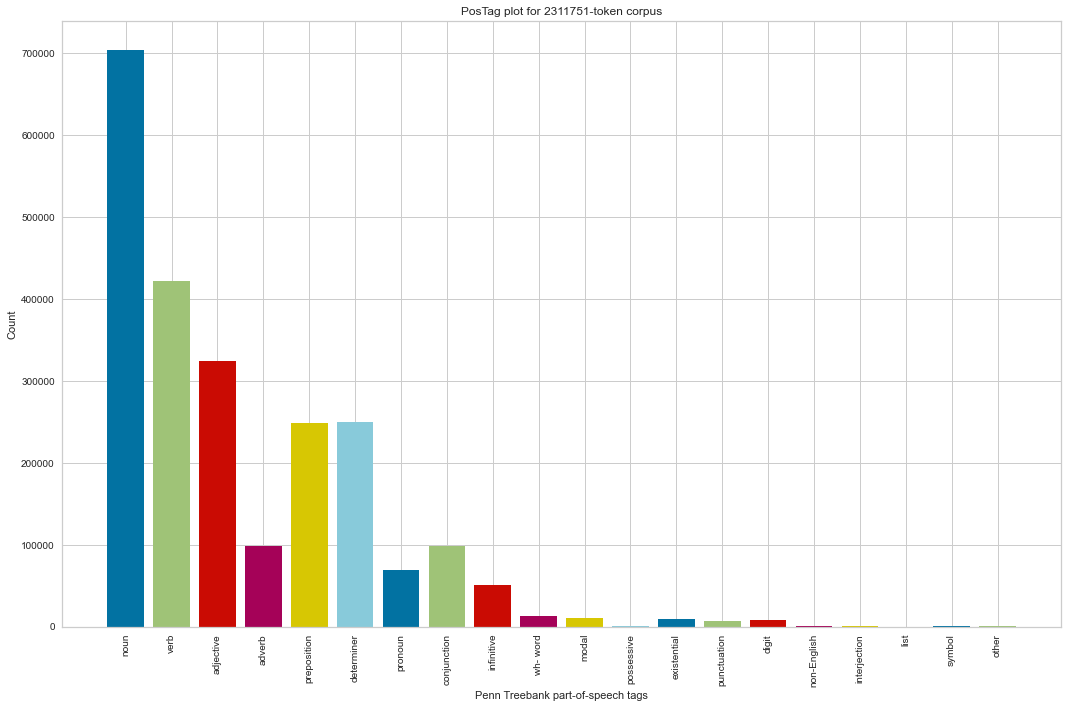

In [26]:
from yellowbrick.text import PosTagVisualizer

# # Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(size=(1080, 720))
viz.fit(postags_plot)
viz.show(outpath="plots/tokens_plot_total_corpus.png")

In [27]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

0       [(subjective, NN), (female, NN), (presents, NN...
1       [(history, NN), (difficulty, NN), (stairs, NNS...
2       [(history, NN), (illness, NN), (i, NN), (abc, ...
3       [(m-mode, NN), (enlargement, NN), (diameter, N...
4       [(left, NN), (cavity, NN), (size, NN), (wall, ...
                              ...                        
4994    [(history, NN), (i, NN), (pleasure, NN), (meet...
4995    [(diagnosis, NN), (kawasaki, NN), (disease, NN...
4996    [(subjective, NN), (female, NN), (today, NN), ...
4997    [(complaint, NN), (male, NN), (presents, NNS),...
4998    [(history, NN), (male, NN), (presents, NNS), (...
Name: Nouns, Length: 4966, dtype: object

In [28]:
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

0       [subjective, female, presents, complaint, alle...
1       [history, difficulty, stairs, difficulty, airl...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, presents, children, hospital...
4998    [history, male, presents, today, recommendatio...
Name: to_be_lemmatized, Length: 4966, dtype: object

In [29]:
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

# print("rocks :", lmtzr.lemmatize("rocks"))

# for dd in data['to_be_lemmatized']:
#     lemma = lmtzr.lemmatize(dd[0])
#     print("%s Lemma:%s" %(dd[0], lemma))
data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

# data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])



0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [30]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize
2990,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a -year-old male pati...,"[history, the, patient, is, a, -year-old, male...","[(history, NN), (the, DT), (patient, NN), (is,...","[(history, NN), (patient, NN), (patient, NN), ...","[history, patient, patient, i, patient, blood,...","[history, patient, patient, i, patient, blood,..."
3186,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"[preoperative, diagnosis, cervical, lymphadeno...","[(preoperative, JJ), (diagnosis, NN), (cervica...","[(diagnosis, NN), (diagnosis, NN), (procedure,...","[diagnosis, diagnosis, procedure, biopsy, lymp...","[diagnosis, diagnosis, procedure, biopsy, lymp..."
2560,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"[findingsthere, are, post, biopsy, changes, se...","[(findingsthere, RB), (are, VBP), (post, JJ), ...","[(biopsy, NN), (changes, NNS), (region, NN), (...","[biopsy, changes, region, aspect, left, breast...","[biopsy, change, region, aspect, left, breast,..."
655,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"[preoperative, diagnoses, recurrent, spinal, s...","[(preoperative, JJ), (diagnoses, NNS), (recurr...","[(diagnoses, NNS), (stenosis, NN), (l, NN), (-...","[diagnoses, stenosis, l, -ll, -land, l, -s, sp...","[diagnosis, stenosis, l, -ll, -land, l, -s, sp..."
4864,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"[reason, for, consultation, abnormal, ekg, and...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (ekg, NN), ...","[reason, consultation, ekg, heart, rate, histo...","[reason, consultation, ekg, heart, rate, histo..."


In [31]:
print(data['lemmatize'])

0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [32]:
type(data['lemmatize'])

pandas.core.series.Series

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   tokenized_sents    4966 non-null   object
 5   POSTags            4966 non-null   object
 6   Nouns              4966 non-null   object
 7   to_be_lemmatized   4966 non-null   object
 8   lemmatize          4966 non-null   object
dtypes: object(9)
memory usage: 548.0+ KB


In [34]:
len(data['lemmatize'][1])


129

In [35]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [36]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize,lemmatize_count
2519,Ultrasound OB - followup for fetal growth.,Obstetrics / Gynecology,Ultrasound OB,reason for exam followup for fetal growth ...,"[reason, for, exam, followup, for, fetal, grow...","[(reason, NN), (for, IN), (exam, NN), (followu...","[(reason, NN), (exam, NN), (followup, NN), (gr...","[reason, exam, followup, growth, interpretatio...","[reason, exam, followup, growth, interpretatio...",70
3362,Patient in with mom for possible ear infection.,General Medicine,Gen Med Consult - 23,subjective mom brings the patient in today fo...,"[subjective, mom, brings, the, patient, in, to...","[(subjective, JJ), (mom, NN), (brings, VBZ), (...","[(mom, NN), (patient, NN), (today, NN), (infec...","[mom, patient, today, infection, ear, pain, to...","[mom, patient, today, infection, ear, pain, to...",81
3658,"Colonoscopy due to rectal bleeding, constipat...",Gastroenterology,Colonoscopy - 1,indication rectal bleeding constipation abn...,"[indication, rectal, bleeding, constipation, a...","[(indication, NN), (rectal, NN), (bleeding, VB...","[(indication, NN), (rectal, NN), (constipation...","[indication, rectal, constipation, ct, rule, i...","[indication, rectal, constipation, ct, rule, i...",12
30,The patient noted for improving retention of ...,Urology,Urinary Retention - Followup,history of present illness the patient present...,"[history, of, present, illness, the, patient, ...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (patient, NN), ...","[history, illness, patient, presents, today, f...","[history, illness, patient, present, today, fo...",57
3579,EGD with dilation for dysphagia.,Gastroenterology,EGD with Dilation,indication,[indication],"[(indication, NN)]","[(indication, NN)]",[indication],[indication],1


In [37]:
del data['to_be_lemmatized']
del data['sample_name']

In [38]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
239,Insertion of transesophageal echocardiography...,Surgery,indications for procedure impending open hear...,"[indications, for, procedure, impending, open,...","[(indications, NNS), (for, IN), (procedure, NN...","[(indications, NNS), (procedure, NN), (heart, ...","[indication, procedure, heart, surgery, closur...",97
3596,Patient with a history of a Nissen fundoplica...,Gastroenterology,admitting diagnoses hiatal hernia gastroesop...,"[admitting, diagnoses, hiatal, hernia, gastroe...","[(admitting, VBG), (diagnoses, NNS), (hiatal, ...","[(diagnoses, NNS), (hernia, NN), (gastroesopha...","[diagnosis, hernia, gastroesophageal, reflux, ...",140
546,Right nodular malignant mesothelioma.,Surgery,preoperative diagnosis right mesothelioma po...,"[preoperative, diagnosis, right, mesothelioma,...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (diagnosis, NN), (lung, NN),...","[diagnosis, diagnosis, lung, mass, diaphragm, ...",252
3009,Acute on chronic renal failure and uremia. I...,Nephrology,preoperative diagnoses acute on chronic renal ...,"[preoperative, diagnoses, acute, on, chronic, ...","[(preoperative, JJ), (diagnoses, NNS), (acute,...","[(diagnoses, NNS), (failure, NN), (diagnoses, ...","[diagnosis, failure, diagnosis, failure, proce...",91
732,Construction of right upper arm hemodialysis ...,Surgery,preoperative diagnosis end-stage renal disease...,"[preoperative, diagnosis, end-stage, renal, di...","[(preoperative, JJ), (diagnosis, NN), (end-sta...","[(diagnosis, NN), (disease, NN), (dialysis, NN...","[diagnosis, disease, dialysis, fistula, diagno...",113


In [39]:
data.reset_index(drop=True)


,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"[subjective, this, -year-old, white, female, p...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"[-d, m-mode, left, atrial, enlargement, with, ...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65
...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"[admitting, diagnosis, kawasaki, disease, disc...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"[subjective, this, is, a, -year-old, white, fe...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"[chief, complaint, this, -year-old, male, pres...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136


In [40]:
# REACH GOAL
# from nltk.tokenize import sent_tokenize
# data["sent_token"] = data["transcription"].apply(lambda x: sent_tokenize(x))


In [41]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 23378
history 9438
procedure 7791
pain 5444
time 4927
/ 4878
i 4675
diagnosis 4522
incision 3905
blood 3803
room 3497
s 3329
day 3325
artery 3162
area 3091
skin 2939
medication 2765
mg 2757
suture 2744
extremity 2718
disease 2631
position 2630
tissue 2536
left 2490
pressure 2479
fashion 2441
x 2404
anesthesia 2311
surgery 2151
heart 2124
mass 2120
condition 2083
evidence 2075
examination 2057
operating 2055
abdomen 2022
muscle 1992
neck 1990
week 1987
lesion 1978
side 1973
catheter 1966
year 1926
complication 1889
level 1874
sign 1857
vicryl 1824
wound 1796
loss 1791
family 1759
risk 1746
care 1739
nerve 1733
symptom 1706
rate 1660
p 1652
head 1628
finding 1628
system 1607
eye 1597
change 1583
foot 1576
bone 1572
right 1548
dissection 1505
tube 1485
dr 1473
point 1461
plan 1459
problem 1458
difficulty 1448
bladder 1436
none 1403
lung 1397
treatment 1382
status 1376
cm 1364
today 1358
exam 1357
female 1351
chest 1340
hospital 1332
site 1328
bowel 1321
knee 1300
evaluation 1296
v

auscultation 148
hyperlipidemia 148
testing 148
name 147
station 147
collateral 147
observation 147
dizziness 147
tachycardia 147
prophylaxis 146
med 146
monitor 146
esmarch 146
entry 146
dementia 146
enlargement 145
pad 145
december 145
duodenum 144
naris 144
mixture 144
flexor 144
lymphadenopathy 143
mattress 143
transfer 143
score 143
dysuria 142
iron 142
velocity 142
adenopathy 141
dysphagia 141
ulceration 141
emg 141
surgeon 140
implantation 140
periosteum 140
interpretation 140
effort 140
tylenol 139
transplant 139
mucosal 139
qd 139
sample 138
loop 138
sweat 138
endoscope 138
osteoarthritis 137
roll 137
drape 137
’ 137
hemorrhoid 136
index 136
preparation 136
relief 136
extraction 136
rupture 136
immunization 135
dialysis 135
labor 135
pigtail 135
genitalia 134
mi 134
prominence 134
splint 134
ointment 133
liquid 133
tomorrow 133
fiber 133
nonsmoker 133
hepatosplenomegaly 133
rale 132
window 132
infusion 132
gradient 131
arch 131
word 131
cn 131
identification 131
prognosis 131


decline 41
detachment 41
deceleration 41
arrest 41
respect 41
calcar 41
wax 41
schedule 41
sequence 41
glenn 41
toxin 41
hilum 41
epiglottis 41
cholangiogram 41
phenomenon 41
diaphoresis 41
interphalangeal 41
puff 41
cns 41
mellitus 41
acne 41
h/o 41
span 41
zyrtec 40
bmi 40
desire 40
hydrochlorothiazide 40
ascites 40
conversation 40
percent 40
impedance 40
gm 40
ground 40
sclerotomy 40
arthrotomy 40
corner 40
infiltrates 40
j 40
xanax 40
specialist 40
move 40
sternocleidomastoid 40
galea 40
calculation 40
ecg 40
lb 40
pedal 40
supplement 40
nystagmus 40
neurologist 40
see 40
arteriotomy 40
cd 40
diovan 40
calcific 40
spect 40
ataxia 40
fluent 40
claritin 39
morphology 39
comorbidities 39
ro 39
uptake 39
vascular 39
correct 39
anus 39
hematochezia 39
company 39
bump 39
dense 39
telemetry 39
bard-parker 39
push 39
bulge 39
vertebra 39
entrapment 39
stat 39
gravity 39
supplementation 39
adequate 39
crepitus 39
appropriate 39
cerebellum 39
pledgets 39
hairline 39
association 39
benadryl 3

straight 25
gastric 25
rex 25
tailor 25
orthopedics 25
footplate 25
bottle 25
tap 25
blepharoplasty 25
pathologist 25
corticosteroid 25
conference 25
grasp 25
photo 25
prematurity 25
accumulation 25
separation 25
distension 25
gastroparesis 25
inspiration 25
slice 25
ostomy 25
doughnut 25
infraspinatus 25
hyperventilation 25
guideline 25
augmentin 25
flagyl 25
glioma 25
gfr 25
hyperthyroidism 25
folate 25
lantus 25
sno 25
artifact 25
arthralgia 25
lle 25
incoordination 25
tid 25
personality 25
topamax 25
student 25
york 24
lipectomy 24
drawn 24
spermatocele 24
et 24
subdartos 24
adhesive 24
burden 24
soap 24
nodularity 24
thinking 24
premarin 24
clamped 24
miscarriage 24
submucosal 24
bulky 24
reference 24
valgus 24
vastus 24
lobule 24
empyema 24
purulence 24
dupuytren 24
intermetatarsal 24
texture 24
primary 24
enema 24
strep 24
stasis 24
monofilament 24
smas 24
fraying 24
macula 24
coil 24
variant 24
botulinum 24
gastrocnemius 24
while 24
blister 24
circle 24
ac 24
country 24
circums

ciprofloxacin 16
irrigant 16
indiana 16
diversion 16
gia-stapler 16
polysorb 16
levator 16
transversalis 16
genitourinary 16
bent 16
ventrum 16
xxxx 16
miralax 16
orchiopexy 16
mortality 16
xiphoid 16
shave 16
zaontz 16
triage 16
bruise 16
sex 16
gomco 16
upj 16
deflux 16
deal 16
preference 16
principle 16
dismissal 16
caliper 16
cordis 16
tenon 16
clivus 16
ethilon 16
mouthgag 16
incus 16
multiparity 16
ventilatory 16
taper 16
sump 16
commissure 16
upwards 16
dacron 16
alba 16
hyperkalemia 16
silver 16
decay 16
bankart 16
jude 16
earlobe 16
prevention 16
herpes 16
dermal 16
endoshears 16
pinpoint 16
arcus 16
plication 16
moisture 16
hyperextension 16
stylet 16
atresia 16
fick 16
persistence 16
quadriparesis 16
phaco 16
ophthalmology 16
beneath 16
input 16
supination 16
pathway 16
areola 16
immunosuppression 16
individual 16
mannitol 16
puncta 16
profound 16
mesosalpinx 16
pathologic 16
medrol 16
flame 16
boundary 16
dyskinesia 16
shelf 16
paraplegia 16
angiomax 16
g-tube 16
barrett 16

anticipatory 12
doxorubicin 12
candidiasis 12
j-tube 12
multisystem 12
stance 12
applanation 12
dna 12
homocystine 12
decongestant 12
eosinophil 12
dermatologist 12
igm 12
sprint 12
orthopedic 11
relaxation 11
lateralization 11
ob/gyn 11
county 11
pretracheal 11
extrusion 11
consults 11
saver 11
wear 11
anterograde 11
hibiclens 11
floseal 11
physical 11
urologist 11
bath 11
hcg 11
vaseline 11
vacation 11
macrodantin 11
ureteroscopy 11
sunday 11
appliance 11
enterococcus 11
winter 11
spoke 11
depressor 11
anesthetist 11
soak 11
oversewn 11
loosening 11
close 11
rent 11
measuring 11
debulking 11
perimeter 11
fine 11
mandible 11
cisterna 11
redundant 11
restenosis 11
spotting 11
laminar 11
underneath 11
vagus 11
tarsal 11
colorado 11
satisfactory 11
buckle 11
thinning 11
metatarsocuneiform 11
lag 11
package 11
dystrophy 11
fluoroscope 11
hemidiaphragm 11
soleus 11
sestamibi 11
hawkins 11
slip 11
profundus 11
z-plasty 11
endeavor 11
irregular 11
outline 11
curet 11
catch 11
laryngectomy 11

rubbery 8
richardson 8
perpendicular 8
sizing 8
keel 8
porcine 8
lupron 8
tonsillolith 8
afrin 8
choanae 8
cottle 8
plica 8
rumel 8
aortotomies 8
reconstructive 8
graftotomy 8
-silk 8
island 8
utilizing 8
-guage 8
aerobic 8
norco 8
indwelling 8
syme 8
laid 8
tentorium 8
delee 8
edc 8
otosclerosis 8
holding 8
styloidectomy 8
intensifier 8
volar 8
sofamor 8
kyphoscoliosis 8
painless 8
dissecting 8
xps 8
pericranium 8
mucocele 8
transfixion 8
ophthalmoscopy 8
turbinectomy 8
maxillary 8
atriotomy 8
pager 8
endoloop 8
salpingooophorectomy 8
oophorectomy 8
bolster 8
chisel 8
rolling 8
allodynia 8
prism 8
canthotomy 8
vulvectomy 8
wood 8
philadelphia 8
transnasal 8
refracture 8
ulna 8
starting 8
inserter 8
honan 8
cracking 8
bevel 8
zeiss 8
press 8
fiberwire 8
qp 8
standby 8
intention 8
polarity 8
msec 8
vt 8
fix 8
r-waves 8
incarceration 8
midway 8
striker 8
osi 8
altercation 8
introducers 8
plating 8
hoffa 8
key 8
lengthening 8
gastroepiploic 8
reexamination 8
morton 8
frozen 8
convex 8
lv-

torus 6
tubarius 6
orbital 6
codman 6
shockwave 6
copeland 6
portnoy 6
endogen 6
septoplasty 6
osteotomes 6
non-st-elevation 6
cl 6
buddy 6
auricular 6
aperture 6
scott 6
ethmoidectomy 6
placud 6
canthal 6
stellate 6
eyelash 6
oc 6
lithotomy 6
valvuloplasty 6
cardiology/cardiothoracic 6
ligaclips 6
macular 6
born 6
context 6
occluder 6
cardiologic 6
port-a-catheter 6
butterfly 6
coblation 6
prolactin 6
pmt 6
slowly 6
duraseal 6
auto 6
fixator 6
injector 6
iol 6
alcon 6
irrigating 6
mcpherson 6
resistant 6
ma 6
discharging 6
i/a 6
forte 6
perlane 6
irrigation/aspiration 6
acetate 6
cineangiogram 6
kessler 6
hyperparathyroidism 6
bloodless 6
medtronics 6
-o 6
detection 6
extracorporeal 6
aware 6
reposition 6
parasymphysis 6
asnis 6
manage 6
ladder 6
fna 6
neonipple 6
placing 6
deflection 6
symmetrization 6
coapt 6
scalenes 6
canaliculus 6
navigation 6
equalization 6
eyedrop 6
stiff 6
asahi 6
mitral 6
endotine 6
torp 6
niche 6
ciprodex 6
rhabdomyosarcoma 6
infraclavicular 6
incorporation 

dedo 4
mylohyoid 4
jps 4
auscultatory 4
shear 4
silicon 4
frosting 4
conservation 4
cmf 4
btl 4
disproportion 4
asynclitism 4
prodromal 4
-chromic 4
iugr 4
avitene 4
-vessel 4
sampling 4
pennington 4
popliteus 4
donjoy 4
mcp 4
diagnosesxxx 4
monoka 4
vocal 4
photo-ablation 4
choledochoscope 4
morcellator 4
needing 4
bloating 4
endoclips 4
reusable 4
adapter 4
reducer 4
studding 4
radical 4
glycol 4
carlos 4
suprapubic 4
double-action 4
exterior 4
dupre 4
kyphon 4
filler 4
aphakia 4
trephine 4
synechiae 4
masticatory 4
ilium 4
particulate 4
peroxide 4
mid-shaft 4
peristalsis 4
bullosa 4
humi 4
cystotomy 4
thighthis 4
boat 4
systemscardiac 4
ssor 4
hickman 4
bicep 4
meningeal 4
subcapital 4
cork 4
trileaflet 4
preinjection 4
postinjection 4
reopro 4
aicd 4
bifurcates 4
countershock 4
findingshemodynamics 4
findingsleft 4
swan 4
prebent 4
fr 4
vvand 4
synopsis 4
ol 4
pulpotomy 4
bezoar 4
witha 4
sub-segment 4
bronchiectasis 4
mpj 4
rosenmüller 4
diep 4
enclosure 4
-curve 4
segmental 4
ass

thrombocythemia 4
historythe 4
absolute 4
malabsorption 4
appendicectomy 4
gouty 4
radium 4
clarithromycin 4
glomerulonephritis 4
mba 4
hg 4
mid-abdomen 4
achy 4
yellowing 4
examtemperature 4
porta 4
ext 4
glomerulus 4
interstitium 4
mesangium 4
filtration 4
mazatlan 4
felodipine 4
pathogen 4
darkening 4
examvs 4
blurriness 4
articulate 4
reassurance 4
foster 4
eisenbaum 4
customer 4
duraphen 4
generic 4
illnessthis 4
ambulator 4
mesna 4
iphc 4
pesce 4
susceptibility 4
surprise 4
leptospirosis 4
mineral 4
restlessness 4
prandin 4
mri/mra 4
cefepime 4
primaxin 4
query 4
blevels 4
aggravating 4
versicolor 4
loss/gain 4
cloudy/dark 4
aches/pains 4
loss/breakage 4
lesions/discoloration 4
breakage/discoloration 4
ssmurmur 4
zyvox 4
winkel 4
war 4
anaphylaxis 4
defecation 4
disclosure 4
thou/µl 4
seroconversion 4
hypoglycemics 4
bay 4
polys 4
transglutaminase 4
ada 4
irc 4
zolpidem 4
triamterene 4
bright 4
dysmotility 4
cholestyramine 4
frenzel 4
dix-hallpike 4
halmagyi 4
betahistine 4
polyc

intra 3
degenerative 3
pre-contrast 3
hounsfield 3
perinephric 3
angiomyolipoma 3
adrenal/kidneys 3
fluid/air 3
nephro-/ureterolithiasis 3
aortobiiliac 3
endolumen 3
aortoiliac 3
hippocampus 3
believing 3
engineering 3
tea 3
anchorage 3
concerta 3
odd 3
conduct 3
fight 3
king 3
apple 3
richard 3
humor 3
nightmare 3
flashback 3
don 3
desyrel 3
music 3
prosody 3
proverb 3
struggle 3
hopelessness 3
restoril 3
probation 3
fmla 3
tardiness 3
workday 3
handling 3
fein 3
chaoticness 3
forgetfulness 3
lawyer 3
tendinopathy 3
propionate 3
janitor 3
bachelor 3
science 3
walter 3
carter 3
puzzle 3
possession 3
historyher 3
chemist 3
ménière 3
fitness 3
confusional 3
attentiveness 3
stimulant 3
linda 3
honor 3
ex-husband 3
refrigerator 3
gallon 3
daniel 3
joke 3
cognistat 3
wasi 3
deli 3
trail 3
wisconsin 3
wcst 3
stroop 3
visual-motor 3
rey 3
harassment 3
adulthood 3
dwyne 3
missouri 3
auditor 3
chrysler 3
vigilant 3
concise 3
loneliness 3
euphoria 3
gustatory 3
derealizations 3
irrelevance 3
eva

subbronchiole 2
thoracoscopic 2
intrathoracic 2
extubate 2
re-inflation 2
ctx 2
operation/procedure 2
re-implanting 2
iliacs 2
pleurectomy 2
ingenuity 2
prestige 2
predialysis 2
milky 2
fainting 2
operations/procedures 2
counter-incisions 2
orthodontist 2
tessier 2
alveoloplasty 2
o-tie 2
postconization 2
interloop 2
gravidapara 2
dissect 2
kochers 2
rso 2
russian 2
anchoring 2
misoprostol 2
lembert 2
buccal 2
canine 2
pericardiotomy 2
colt 2
methergine 2
procedureemergent 2
containing 2
superficially 2
petty 2
locator 2
gastrostomya 2
vanderbilt 2
crosssail 2
+vacuum 2
ab 2
-ve 2
arom 2
conductive 2
reinspection 2
jordan 2
ossicular 2
scutum 2
chorda 2
rosette 2
superstructure 2
slim 2
crimper 2
perilymph 2
reno 2
condition/dysfunction 2
gowning 2
thrust 2
cavitation 2
ecrl 2
ecrb 2
slac 2
ebi 2
straight-ahead 2
ton 2
derotation 2
midsubstance 2
dorsiflex 2
biter 2
merocels 2
meroceles 2
seeker 2
periorbit 2
pyramid 2
kennedy 2
lithotriptor 2
prong 2
hakim 2
subtemporal 2
brushingspro

colitis-like 2
injection-lift 2
non-bleeding 2
token 2
sever 2
ec 2
glucagon 2
totality 2
persists 2
splenic 2
retroflex 2
confirming 2
type-iii 2
milking 2
premedicationsee 2
vascularization 2
hemiuvulas 2
delaire 2
allows 2
mmf 2
mouthrinse 2
-balloon 2
predilations 2
lf 2
branching 2
diagnosisgallstone 2
sphincterotomy 2
dorsey 2
subxiphoid 2
specimensgallbladder 2
right-angle 2
morrison 2
positivity 2
histopathology 2
activase 2
infuse-a-port 2
wider 2
performedremoval 2
wall/uterine/bladder 2
parkland 2
fibromuscular 2
palacos 2
intercondylar 2
impactor 2
pegboard 2
minimus 2
subsidence 2
conservator 2
ship 2
phalange 2
findings/specimens 2
septectomy 2
cephazolin 2
j-end 2
supraglottic 2
multilumen 2
alfentanil 2
eserine 2
microblade 2
phacoemulsifier 2
keratotomy 2
phaco-chop 2
weck-cels 2
diamox 2
self-retractor 2
litter 2
dissecans 2
trailing 2
hypothenar 2
crossing 2
contention 2
palmer 2
vessiloops 2
nonkinking 2
wrapped 2
argyle 2
debakey 2
short 2
flapping 2
sdi 2
brevital

transcatheter 2
ait 2
sl-microcatheter 2
transcend 2
platinum 2
microcatheter 2
biplane 2
roadmapping 2
ophthalmic 2
herniorrhaphies 2
-beers/day 2
stoke 2
+pack-yr 2
/hrrro 2
de 2
moines 2
dysdiadochokinesis 2
dyssynergic 2
+wbc 2
ftvdrl 2
pg/ml 2
schilling 2
dure 2
hu 2
abuts 2
specificity 2
prelaryngeal 2
rosenmuller 2
submandibular 2
subdurals 2
breadth 2
hygroma 2
medsmicronase 2
cholecystemomy 2
fhxgrand 2
breakaway 2
pp/vib/prop/lt/t/graphesthesia 2
heubner 2
facial/lue/lle 2
drag 2
infiltrates/consolidation 2
infiltrate/consolidation 2
drug/etoh/tobacco 2
/hrrrt 2
prefer 2
cbc/blood 2
cx/esr/pt/ptt/gs/csf 2
cx/ana 2
cmh 2
y/orhm 2
binocular 2
fhxhtn 2
sweats/cp/sob 2
/hrrrwt 2
studies/course 2
/event 2
claustrum 2
lbbb 2
mower 2
couch 2
engine 2
latent 2
vergae 2
ftvit 2
mil/mm 2
k/mm 2
realm 2
dysfluent 2
/repeat 2
selverstone 2
expressive 2
sah 2
nimodipine 2
homosexuality 2
/transthoracic 2
medsnafcillin 2
rifampin 2
janeway 2
/neurosurgery 2
tongue-biting 2
examtechnique 2


hvamc 2
icteric 2
ruq 2
asterixis 2
night-sweats 2
noncaseating 2
hepatis 2
migratory 2
nausea/vomiting 2
examinationvs 2
mcps 2
predominance 2
biopsymicroscopic 2
tubule 2
ckappa 2
lambda 2
tubular 2
interpositioning 2
substrate 2
woke 2
biaxin 2
dbut 2
bed-bound 2
nystatin 2
avandia 2
lidoderm 2
dietary 2
harmony 2
ayrgel 2
xalatan 2
palliative 2
hudyncia 2
annulose 2
phlebotomist 2
historysignificant 2
medicationsnexium 2
needlestick 2
squeakiness 2
conditionhe 2
scapular 2
vl 2
mph 2
cyclophosphamide/prednisone 2
prostitute 2
japan 2
plumber 2
methocarbamol 2
potty 2
ragweed 2
c/o 2
qod 2
metolazone 2
captopril 2
qpm 2
canula 2
b/l 2
rap 2
gray 2
impetigo 2
tachypneic 2
respite 2
grandma 2
isomil 2
grow 2
deadline 2
hesitation 2
cutivate 2
lichenification 2
discitis 2
mycins 2
hematological 2
/these 2
shiny 2
doughiness 2
tweezer 2
horse 2
wooden 2
minocin 2
discontinuing 2
kumar 2
+/iv 2
taxi 2
offs 2
chem-and 2
cable 2
bcentrum 2
stepchild 2
about 2
fluoroquinolone 2
mess 2
pmr 2

hyperhidrosis 1
druj 1
health/review 1
findingsmusculoskeletal 1
malarone 1
chopart 1
rerupture 1
¼ 1
tide 1
pillowcase 1
transparency 1
steam 1
sunlight 1
eyeglass 1
coating 1
shopping 1
toxemia 1
hydatiform 1
mimic 1
twitch 1
caffeineyou 1
restricting 1
saltyou 1
rugation 1
xyzal 1
retrolisthesis 1
assassin 1
luggage 1
alarm 1
florist 1
arranging 1
cash 1
register 1
tfts 1
penmanship 1
child-like 1
halting 1
quadrantanopsia 1
extinguishing 1
ftand 1
spongiform 1
heidenhaim 1
cingulate 1
hypothalamus 1
autoclaving 1
protease 1
cjd 1
hypesthesia 1
invagination 1
descension 1
pons/medulla 1
clivus/odontoid 1
asia 1
sulphate 1
aranesp 1
-ml/min 1
detroit 1
farsightedness 1
bland 1
sediment 1
logic 1
bnp/bmp 1
than/less 1
ruby 1
camilla 1
supermarket 1
great-grandchildren 1
peri-ostomy 1
colleague 1
inform 1
goodbye 1
dozen 1
terminality 1
interferes 1
religion 1
catholic 1
metastatic 1
pregabalin 1
-ml 1
kaposi 1
paracolic 1
hfa 1
bsa 1
light-headedness 1
mone 1
carpet 1
reticular 1
nodu

In [42]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
# data.sample(5)

In [43]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

0       ['subjective', 'this', '-year-old', 'white', '...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '-year-old',...
4997    ['chief', 'complaint', 'this', '-year-old', 'm...
4998    ['history', 'a', '-year-old', 'male', 'present...
Name: tokenized_sents, Length: 4966, dtype: object

In [44]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
3998,"Skin biopsy, scalp mole. Darkened mole statu...",Dermatology,procedure skin biopsy scalp mole indication ...,"['procedure', 'skin', 'biopsy', 'scalp', 'mole...","[(procedure, NN), (skin, NN), (biopsy, NN), (s...","[(procedure, NN), (skin, NN), (biopsy, NN), (i...","[procedure, skin, biopsy, indication, female, ...",43,103
2108,"Open reduction and internal fixation, high gr...",Orthopedic,preoperative diagnosis severely comminuted fra...,"['preoperative', 'diagnosis', 'severely', 'com...","[(preoperative, JJ), (diagnosis, NN), (severel...","[(diagnosis, NN), (fracture, NN), (radius, NN)...","[diagnosis, fracture, radius, diagnosis, fract...",199,734
1239,Anterior cervical discectomy and osteophytect...,Surgery,preoperative diagnoses cervical radiculopathy...,"['preoperative', 'diagnoses', 'cervical', 'rad...","[(preoperative, JJ), (diagnoses, NNS), (cervic...","[(diagnoses, NNS), (c, NN), (-c, NN), (-c, NNP...","[diagnosis, c, -c, -c, spondylosis, c, -c, -c,...",340,1038
4137,Patient presents for treatment of suspected r...,Consult - History and Phy.,chief complaint this year old male presents t...,"['chief', 'complaint', 'this', 'year', 'old', ...","[(chief, JJ), (complaint, NN), (this, DT), (ye...","[(complaint, NN), (year, NN), (male, NN), (pre...","[complaint, year, male, present, today, treatm...",279,626
99,Direct right inguinal hernia. Marlex repair ...,Urology,preoperative diagnosis right inguinal hernia ...,"['preoperative', 'diagnosis', 'right', 'inguin...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (hernia, NN), (diagnosis, NN...","[diagnosis, hernia, diagnosis, inguinal, herni...",79,282


In [45]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [46]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [47]:
data['medical_specialty'].nunique()

40

In [48]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [49]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [50]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].mean())
print(data['lemmatize_count'].median())

142.34271156402303
126.0


In [51]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

837
1


In [52]:
data['lemmatize_count'].value_counts().sample(50)

477     2
506     3
156    18
283     2
135    13
231    13
312     2
197    11
3       4
266     4
348     4
285     2
264    11
29      4
353     4
237     7
31      9
166     9
86     12
246     6
46     24
92     22
137    21
68     21
254     7
160    14
215     9
295     2
432     2
19      5
37     18
206     7
25      1
127    16
291     2
381     5
111    19
152    18
139    17
64     17
62     27
73     18
230    10
124    24
209     8
76     37
299     9
275     2
391     1
60     16
Name: lemmatize_count, dtype: int64

In [53]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,141.090074,121.0
Consult - History and Phy.,516,175.949612,157.0
Cardiovascular / Pulmonary,371,134.854447,119.0
Orthopedic,355,168.360563,154.0
Radiology,273,93.575092,77.0
General Medicine,259,148.972973,138.0
Gastroenterology,224,109.727679,93.0
Neurology,223,155.430493,142.0
Urology,156,119.339744,105.0


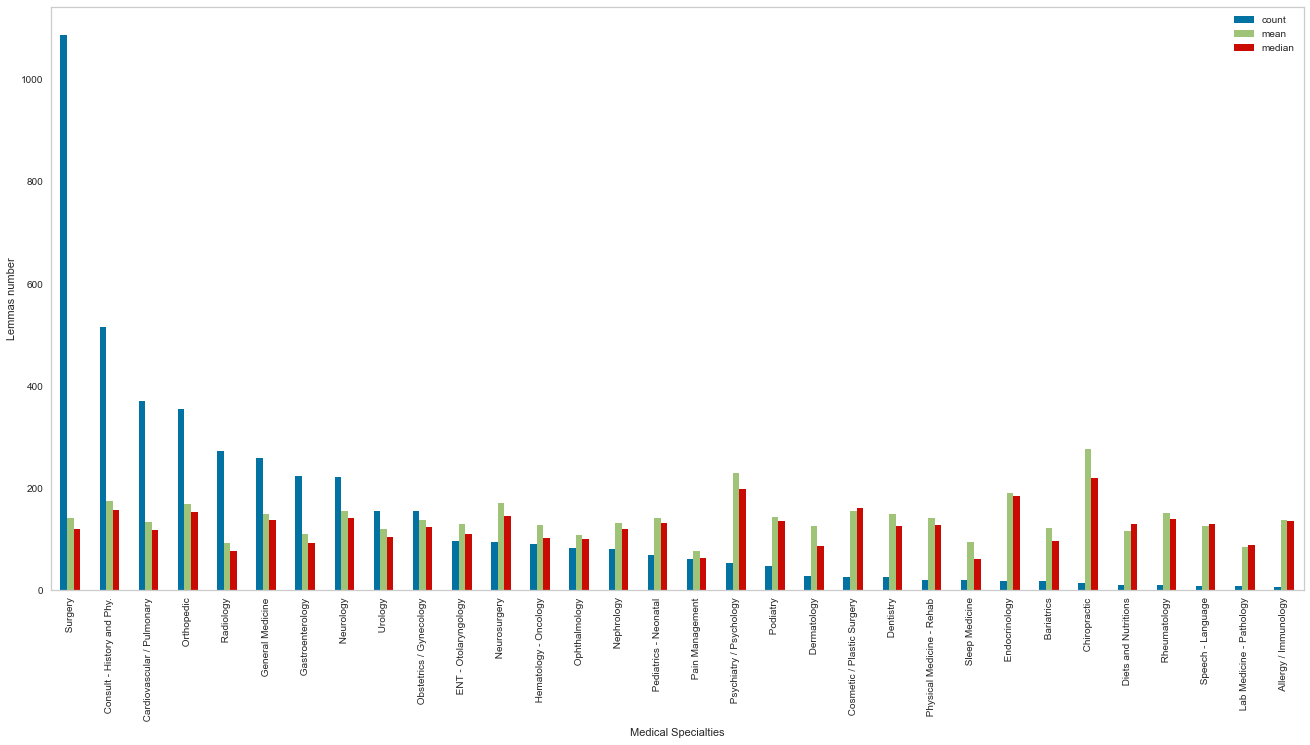

In [54]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [55]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [56]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language          

In [57]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language                9
 Lab Medicine - Pathology   

In [58]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [59]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [60]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   transcription      4514 non-null   object
 3   tokenized_sents    4514 non-null   object
 4   POSTags            4514 non-null   object
 5   Nouns              4514 non-null   object
 6   lemmatize          4514 non-null   object
 7   lemmatize_count    4514 non-null   int64 
 8   tokens             4514 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 512.7+ KB


In [62]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of Lemma
data = data[(data['lemmatize_count'] >= 60) & (data['lemmatize_count'] <= 250)]
print(data['lemmatize_count'].min())
print(data['lemmatize_count'].max())

60
250


In [63]:
data['medical_specialty'].nunique()

27

In [64]:
data['medical_specialty'].value_counts()

 Surgery                       818
 Consult - History and Phy.    396
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Dentistry                      25
 Podiatry                       25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [65]:
print(data['tokens'].min())
print(data['tokens'].max())

102
969


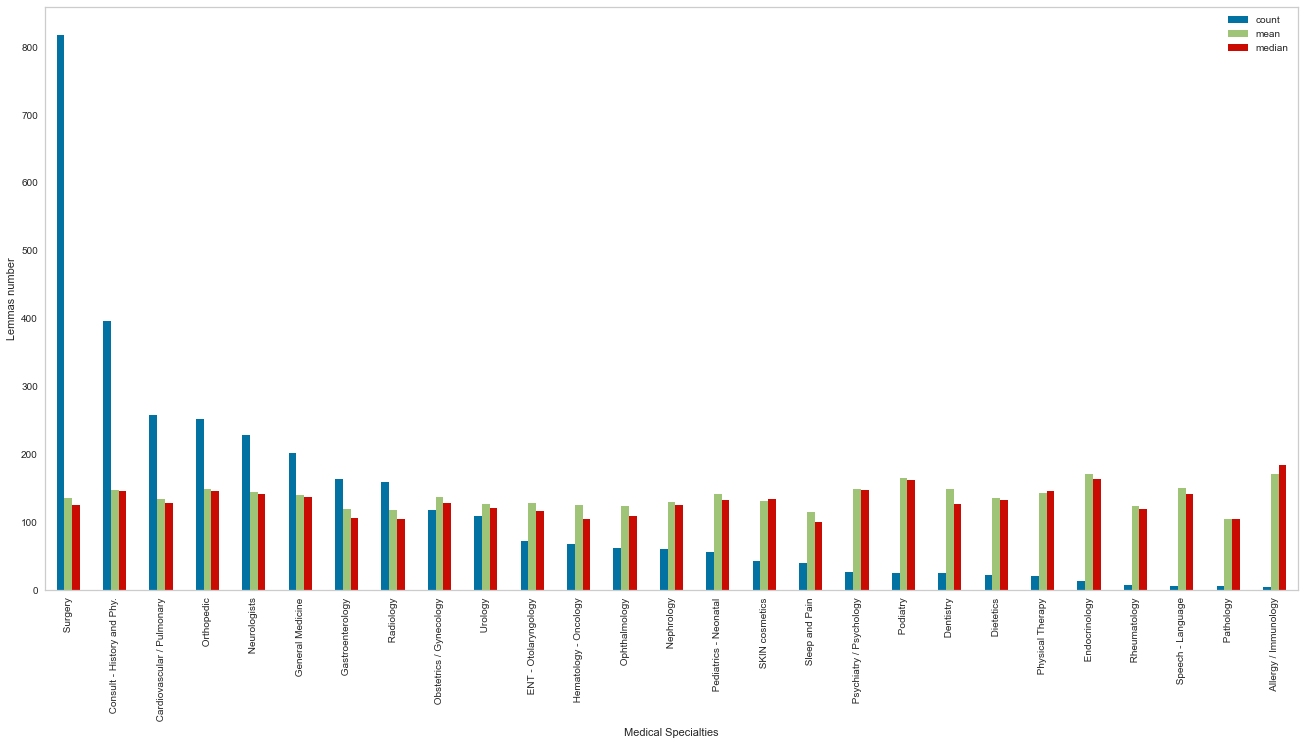

In [67]:
# Cleaned snapshot
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('plots/Corpus_view_with_Lemmas_after_first_reduction.png')

In [68]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,818,135.386308,126.0
Consult - History and Phy.,396,148.037879,147.0
Cardiovascular / Pulmonary,259,133.853282,128.0
Orthopedic,253,149.221344,146.0
Neurologists,229,144.537118,142.0
General Medicine,203,141.103448,138.0
Gastroenterology,164,119.567073,107.0
Radiology,160,117.881250,105.0
Obstetrics / Gynecology,119,136.798319,129.0


In [69]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
1734,Cardiolite treadmill exercise stress test. T...,Radiology,cardiolite treadmill exercise stress test clin...,"['cardiolite', 'treadmill', 'exercise', 'stres...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[cardiolite, treadmill, exercise, stress, test...",67,193
4321,Local reaction secondary to insect sting. Pa...,Consult - History and Phy.,history of present illness patient is a -ye...,"['history', 'of', 'present', 'illness', 'patie...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (patient, NN), (male, NN), (wi...","[history, patient, male, wife, bee, hand, hand...",117,473
2400,"Cataract, right eye. Phacoemulsification wit...",Ophthalmology,preoperative diagnosis cataract right eye po...,"['preoperative', 'diagnosis', 'cataract', 'rig...","[(preoperative, JJ), (diagnosis, NN), (catarac...","[(diagnosis, NN), (cataract, NN), (eye, NN), (...","[diagnosis, cataract, eye, diagnosis, cataract...",90,298
4056,Nipple areolar reconstruction utilizing a ful...,SKIN cosmetics,preoperative diagnoses surgical absence of le...,"['preoperative', 'diagnoses', 'surgical', 'abs...","[(preoperative, JJ), (diagnoses, NNS), (surgic...","[(diagnoses, NNS), (absence, NN), (areola, NN)...","[diagnosis, absence, areola, history, breast, ...",179,610
2217,Hardware removal in the left elbow.,Orthopedic,preoperative diagnosis retained hardware in le...,"['preoperative', 'diagnosis', 'retained', 'har...","[(preoperative, JJ), (diagnosis, NN), (retaine...","[(diagnosis, NN), (hardware, NN), (elbow, NN),...","[diagnosis, hardware, elbow, diagnosis, hardwa...",121,365


In [70]:
# data['lemmatize'].astype('str')

# data_test = data


In [71]:
# data = data_test


In [72]:
data_all_surgery = data[data['medical_specialty'] == ' Surgery']

In [73]:
data_all_surgery 

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
181,Wound debridement with removal of Surgisis xe...,Surgery,preoperative diagnoses open wound from right ...,"['preoperative', 'diagnoses', 'open', 'wound',...","[(preoperative, JJ), (diagnoses, NNS), (open, ...","[(diagnoses, NNS), (axilla, NN), (abdomen, NNS...","[diagnosis, axilla, abdomen, vascular, graft, ...",88,345
182,Visually significant posterior capsule opacit...,Surgery,preoperative diagnosis visually significant p...,"['preoperative', 'diagnosis', 'visually', 'sig...","[(preoperative, JJ), (diagnosis, NN), (visuall...","[(diagnosis, NN), (capsule, NN), (opacity, NN)...","[diagnosis, capsule, opacity, eye, diagnosis, ...",66,207
185,Placement of right new ventriculoperitoneal (...,Surgery,title of operation placement of right new vent...,"['title', 'of', 'operation', 'placement', 'of'...","[(title, NN), (of, IN), (operation, NN), (plac...","[(title, NN), (operation, NN), (placement, NN)...","[title, operation, placement, ventriculoperito...",75,268
190,Unilateral transpedicular T11 vertebroplasty.,Surgery,preoperative diagnosis tcompression fracture ...,"['preoperative', 'diagnosis', 'tcompression', ...","[(preoperative, JJ), (diagnosis, NN), (tcompre...","[(diagnosis, NN), (tcompression, NN), (fractur...","[diagnosis, tcompression, fracture, pain, diag...",106,357
191,Insertion of a VVIR permanent pacemaker. Thi...,Surgery,procedure performed insertion of a vvir perma...,"['procedure', 'performed', 'insertion', 'of', ...","[(procedure, NN), (performed, VBD), (insertion...","[(procedure, NN), (insertion, NN), (pacemaker,...","[procedure, insertion, pacemaker, complication...",189,602
...,...,...,...,...,...,...,...,...,...
1276,Removal of the hardware and revision of right...,Surgery,preoperative diagnosis right ac separation p...,"['preoperative', 'diagnosis', 'right', 'ac', '...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (separation, NN), (diagnosis...","[diagnosis, separation, diagnosis, separation,...",61,210
1277,"Excision of abscess, removal of foreign body....",Surgery,preoperative diagnosis recurrent re-infected s...,"['preoperative', 'diagnosis', 'recurrent', 're...","[(preoperative, JJ), (diagnosis, NN), (recurre...","[(diagnosis, NN), (recurrent, NN), (cyst, NN),...","[diagnosis, recurrent, cyst, abdomen, diagnosi...",91,344
1278,Congenital chylous ascites and chylothorax an...,Surgery,preoperative diagnoses congenital chylous ...,"['preoperative', 'diagnoses', 'congenital', 'c...","[(preoperative, JJ), (diagnoses, NNS), (congen...","[(diagnoses, NNS), (ascites, NNS), (chylothora...","[diagnosis, ascites, chylothorax, rule, leak, ...",214,823
1279,Incision and drainage (I&D) of abdominal absc...,Surgery,preoperative diagnosis abdominal wall abscess ...,"['preoperative', 'diagnosis', 'abdominal', 'wa...","[(preoperative, JJ), (diagnosis, NN), (abdomin...","[(diagnosis, NN), (wall, NN), (abscess, NN), (...","[diagnosis, wall, abscess, diagnosis, wall, pr...",91,313


In [74]:
data_no_surgery = data[data['medical_specialty'] != ' Surgery']

In [75]:
random_data_surgery = data_all_surgery.sample(n=250)

In [76]:
data = pd.concat([data_no_surgery, random_data_surgery])

In [77]:
data_all_consultancy = data[data['medical_specialty'] == ' Consult - History and Phy.']

In [78]:
data_no_consultancy = data[data['medical_specialty'] != ' Consult - History and Phy.']

In [79]:
random_data_consultancy = data_all_consultancy.sample(n=250)

In [80]:
data = pd.concat([data_no_consultancy, random_data_consultancy])

In [81]:
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Dentistry                      25
 Podiatry                       25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [82]:
data = data.replace({' Pediatrics - Neonatal': " Others", " SKIN cosmetics": ' Others',' Sleep and Pain': ' Others',
                     ' Psychiatry / Psychology':' Others', ' Dentistry': ' Others', ' Podiatry':' Others'})
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 Others                        219
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [83]:
data = data.replace({' Dietetics': " Others", " Physical Therapy": ' Others',' Endocrinology': ' Others',
                     ' Rheumatology':' Others', ' Speech - Language': ' Others', ' Pathology':' Others', ' Allergy / Immunology': ' Others' })
data['medical_specialty'].value_counts()

 Others                        303
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
Name: medical_specialty, dtype: int64

In [84]:
data.shape

(2563, 9)

In [85]:
# data['lemmatize_to_string']= data['lemmatize'].astype('str')
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Baseline accuracy
It sets the benchmark in terms of minimum accuracy which the model should achieve. It is calculated as the number of times the majority class appears in the target variable, divided by the total number of observations.

In [86]:
print(303/2563)

0.11822083495903238


# Creating the Model

In [87]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(2563, 9) (2563,)


In [88]:
X

,description,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens,lemmatize_to_string
1,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348,history difficulty stair difficulty airline se...
2,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704,history illness i abc today gentleman year pou...
4,2-D Echocardiogram,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221,left cavity size wall thickness wall motion fu...
5,Morbid obesity. Laparoscopic antecolic anteg...,preoperative diagnosis morbid obesity postope...,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","[(diagnosis, NN), (morbid, NN), (obesity, NN),...","[diagnosis, morbid, obesity, diagnosis, morbid...",231,719,diagnosis morbid obesity diagnosis morbid obes...
6,"Liposuction of the supraumbilical abdomen, re...",preoperative diagnoses deformity right breast...,"['preoperative', 'diagnoses', 'deformity', 'ri...","[(preoperative, JJ), (diagnoses, NNS), (deform...","[(diagnoses, NNS), (deformity, NN), (breast, N...","[diagnosis, deformity, breast, reconstruction,...",175,599,diagnosis deformity breast reconstruction tiss...
...,...,...,...,...,...,...,...,...,...
4318,"Chief complaint of chest pain, previously dia...",history patient is a -year-old white woman w...,"['history', 'patient', 'is', 'a', '-year-old',...","[(history, NN), (patient, NN), (is, VBZ), (a, ...","[(history, NN), (patient, NN), (woman, NN), (c...","[history, patient, woman, complaint, chest, pa...",164,476,history patient woman complaint chest pain hyp...
4502,"A 37-year-old admitted through emergency, pre...",reason for consultation chest pain history o...,"['reason', 'for', 'consultation', 'chest', 'pa...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (chest, NN)...","[reason, consultation, chest, pain, history, i...",150,397,reason consultation chest pain history illness...
4359,The patient is a 61-year-old lady who was fou...,history of present illness goes back to yester...,"['history', 'of', 'present', 'illness', 'goes'...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (yesterday, NN)...","[history, illness, yesterday, patient, dinner,...",180,532,history illness yesterday patient dinner boyfr...
4494,Marked right hydronephrosis without hydruria.,chief complaint right hydronephrosis history...,"['chief', 'complaint', 'right', 'hydronephrosi...","[(chief, JJ), (complaint, NN), (right, JJ), (h...","[(complaint, NN), (hydronephrosis, NN), (histo...","[complaint, hydronephrosis, history, illness, ...",97,346,complaint hydronephrosis history illness patie...


In [89]:
y.nunique()

15

In [90]:
y.unique()

array([' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.'],
      dtype=object)

In [91]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [92]:
#We imports the module for creating training and test data sets.
from sklearn.model_selection import train_test_split

#The third line creates the training (X_train, y_train) and test set (X-test, y_test) arrays,  The 'random_state' argument ensures that the results are reproducible.
X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, test_size=0.30, random_state=100)

#The fourth line prints the shape of the overall, training and test dataset, respectively.
print(data.shape); print(X_train.shape); print(X_test.shape)

(2563, 10)
(1794,)
(769,)


In [93]:
X_train

1781    data psychosis history illness patient samoan ...
1603    cc onset blindness hx y/o rhf state / / tongue...
4975    history illness mr abc gentleman stress test t...
2080    diagnosis ankle sprain history patient female ...
2385    diagnosis globe prolapse ox diagnosis globe pr...
                              ...                        
1844    complaint foot history illness school athlete ...
4806    indication pain interpretation heart rate bloo...
112     diagnosis hypospadias diagnosis hypospadias pr...
4711    reason consult effusion history illness patien...
3565    complaint stomach pain week history illness pa...
Name: lemmatize_to_string, Length: 1794, dtype: object

In [94]:
X_test

1220    diagnosis acute appendicitis diagnosis acute a...
4345    complaint baby fever hour history illness infa...
4287    reason visit patient evaluation mr meningioma ...
521     diagnosisleft breast mass mammogram diagnosis ...
1734    cardiolite treadmill exercise stress test data...
                              ...                        
3051    diagnosis disease vein occlusion status post t...
1037    procedure system cineangiography system cinean...
592     diagnosis pregnancy week testing induction dia...
3310    patient headache spell rash right calf dizzine...
339     diagnosis mass skin lesion diagnosis mass skin...
Name: lemmatize_to_string, Length: 769, dtype: object

In [95]:
y_train

1781                         Others
1603                      Radiology
4975     Cardiovascular / Pulmonary
2080                     Orthopedic
2385                  Ophthalmology
                   ...             
1844                         Others
4806     Cardiovascular / Pulmonary
112                         Urology
4711     Cardiovascular / Pulmonary
3565               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [96]:
y_test

1220                        Surgery
4345     Consult - History and Phy.
4287     Consult - History and Phy.
521                         Surgery
1734                      Radiology
                   ...             
3051                     Nephrology
1037                        Surgery
592                         Surgery
3310               General Medicine
339                         Surgery
Name: medical_specialty, Length: 769, dtype: object

# Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

In [98]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 

#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [99]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer()

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['__', '___', '____', '_____', '______', '_______', 'aand', 'abbott', 'abc', 'abcd']


In [100]:
print(train_tfIdf)

  (0, 4426)	0.07590433166141698
  (0, 8353)	0.05945259583830843
  (0, 5924)	0.03535843873230009
  (0, 2618)	0.08780232667920221
  (0, 1671)	0.050597321550177245
  (0, 8819)	0.11254114084907248
  (0, 4085)	0.09170413030624837
  (0, 4083)	0.08316182810539358
  (0, 667)	0.09892144194418001
  (0, 8245)	0.09738180794859005
  (0, 4259)	0.10450303136748233
  (0, 6872)	0.06231476315933171
  (0, 4701)	0.20900606273496466
  (0, 1278)	0.07456893707538856
  (0, 9085)	0.09528920385046431
  (0, 8800)	0.08870323272265097
  (0, 8526)	0.13122026174164783
  (0, 3527)	0.09738180794859005
  (0, 924)	0.09892144194418001
  (0, 4587)	0.18248483514250563
  (0, 8478)	0.1031197602172632
  (0, 2949)	0.13178839794535913
  (0, 3734)	0.057393841265867176
  (0, 440)	0.07215704702051476
  (0, 2152)	0.0698570074218224
  :	:
  (1793, 5169)	0.0788468720286062
  (1793, 5377)	0.05017283719337952
  (1793, 2937)	0.039585826061174584
  (1793, 7238)	0.07267250989288125
  (1793, 971)	0.06317878566190263
  (1793, 8812)	0.045590

In [101]:
# [np.array(X_train[i]) for i in X_train.index]

In [102]:
# # The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
# from sklearn.feature_extraction.text import TfidfVectorizer

# # The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
# vectorizer_tfidf = TfidfVectorizer()

# # The third line fits and transforms the training data.
# train_tfIdf = vectorizer_tfidf.fit_transform([np.array(X_train[i]) for i in X_train.index])

# # The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
# test_tfIdf = vectorizer_tfidf.transform([np.array(X_test[i]) for i in X_test.index])

# print(vectorizer_tfidf.get_feature_names()[:10])

In [103]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

(1794, 9291)
(769, 9291)


In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

[' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']


In [105]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']
Actual Labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [106]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Consult - History and Phy.,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Surgery,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary


In [107]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

0.34850455136540964
[[41 18  0  0  0  0  0  0  0  0  0  1  0  7  0]
 [ 1 52  0  0  0  0  0  5  0  0  4 10  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0  0  4  0 12  0]
 [ 1 11  0 20  0  0  0  0  0  0  0  3  2  9  0]
 [ 2 64  0  0  1  0  0  0  0  0  0  4  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  1  5  0]
 [ 3  9  0  0  0  0  0  0  0  0  0  1  1  5  0]
 [ 3 10  0  0  0  0  0 26  0  0 10  9  1 10  0]
 [ 0  8  0  1  0  0  0  0  7  0  0  3  0 13  0]
 [ 0  3  0  0  0  0  0  0  0  3  0  1  0 12  0]
 [ 0  6  0  0  0  0  0  3  0  0 60  9  0  1  0]
 [ 4 36  0  0  0  0  0  4  0  0 14 33  0 12  0]
 [ 9  1  0  5  0  0  0 17  1  0 10  3  0  0  0]
 [14  1  0  7  0  0  0  2  3  1 15  3  0 24  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  1  0 19  1]]


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[41, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  7,  0],
       [ 1, 52,  0,  0,  0,  0,  0,  5,  0,  0,  4, 10,  0,  0,  0],
       [ 1,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0, 12,  0],
       [ 1, 11,  0, 20,  0,  0,  0,  0,  0,  0,  0,  3,  2,  9,  0],
       [ 2, 64,  0,  0,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  0],
       [ 3,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  5,  0],
       [ 3, 10,  0,  0,  0,  0,  0, 26,  0,  0, 10,  9,  1, 10,  0],
       [ 0,  8,  0,  1,  0,  0,  0,  0,  7,  0,  0,  3,  0, 13,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  3,  0,  1,  0, 12,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  3,  0,  0, 60,  9,  0,  1,  0],
       [ 4, 36,  0,  0,  0,  0,  0,  4,  0,  0, 14, 33,  0, 12,  0],
       [ 9,  1,  0,  5,  0,  0,  0, 17,  1,  0, 10,  3,  0,  0,  0],
       [14,  1,  0,  7,  0,  0,  0,  2,  3,  1, 15,  3,  0, 24,  0],
       [ 0, 13,  0,  0,  0,  0,  0

In [109]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [110]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.52      0.61      0.56        67
 Cardiovascular / Pulmonary       0.21      0.72      0.32        72
               Neurologists       0.00      0.00      0.00        24
                    Urology       0.61      0.43      0.51        46
           General Medicine       1.00      0.01      0.03        71
                  Radiology       0.00      0.00      0.00        18
                 Orthopedic       0.00      0.00      0.00        19
              Ophthalmology       0.46      0.38      0.41        69
    Obstetrics / Gynecology       0.64      0.22      0.33        32
                 Nephrology       0.75      0.16      0.26        19
      Hematology - Oncology       0.53      0.76      0.63        79
           Gastroenterology       0.39      0.32      0.35       103
       ENT - Otolaryngology       0.00      0.00      0.00        46
                    Surgery      

<AxesSubplot:title={'center':'MultinomialNB Classification Report'}>

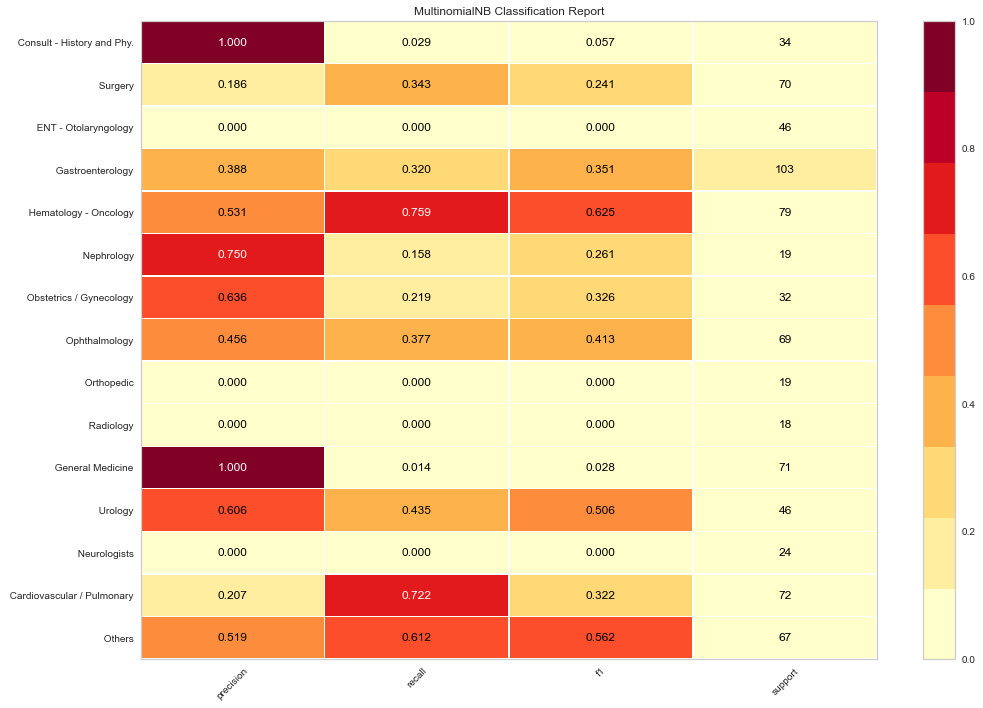

In [111]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(nb_classifier, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_multinomial_WITHREDUCTION.png")

precision
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

recall
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

0.28218465539661897

In [113]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

[' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Others' ' Orthopedic'
 ' Surgery' ' Cardiovascular / Pulmonary']
0.28218465539661897
[[27  9  2  0  6  0  0  1  0  0  0  3 10  9  0]
 [ 3 12  0  5 23  1  1  8  1  0  4 13  0  0  1]
 [ 0  3  5  0  0  0  0  0  0  0  1  5  2  8  0]
 [ 2  6  0 12  4  0  4  0  0  0  0  4  2 12  0]
 [ 6 30  0  2 21  0  0  0  0  0  1 10  1  0  0]
 [ 0  7  1  0  3  1  0  0  1  0  1  1  1  2  0]
 [ 2  5  0  2  3  0  1  0  0  0  0  0  1  2  3]
 [ 2  9  0  0  1  1  0 18  0  0 11  5 12 10  0]
 [ 0  4  0  0  0  1  0  0 17  0  0  1  4  5  0]
 [ 0  1  0  0  0  0  0  0  0 10  0  1  0  7  0]
 [ 0  6  0  0  0  1  0 12  0  0 37  7  6 10  0]
 [ 7 22  2  1  2  0  0  3  0  1 13 39  5  8  0]
 [ 8  0  0  2  0  0  3 13  3  0  8  5  4  0  0]
 [14  0  4 12  0  1  1  1  6  5 15  2  0  4  5]
 [ 3  7  0  0  1  0  1  0  0  0  0  5  0  8  9]]


In [114]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [115]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

[(0.00702218261593662, ' ENT - Otolaryngology'),
 (0.00039079129770198457, ' Obstetrics / Gynecology'),
 (9.98180654470047e-05, ' Others'),
 (6.897293245318188e-05, ' Radiology'),
 (5.956219729932009e-05, ' Nephrology'),
 (5.5435593854825016e-05, ' Consult - History and Phy.'),
 (3.465432228101934e-05, ' General Medicine'),
 (3.4014169914573456e-05, ' Urology'),
 (1.7449094838949524e-05, ' Gastroenterology'),
 (1.551842651250871e-05, ' Surgery'),
 (8.295390728344076e-06, ' Hematology - Oncology'),
 (7.997217534339407e-06, ' Cardiovascular / Pulmonary'),
 (2.8724247739774686e-06, ' Orthopedic'),
 (2.6393232272619114e-06, ' Neurologists'),
 (0.0, ' Ophthalmology')]

In [116]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.36      0.40      0.38        67
 Cardiovascular / Pulmonary       0.10      0.17      0.12        72
               Neurologists       0.36      0.21      0.26        24
                    Urology       0.33      0.26      0.29        46
           General Medicine       0.33      0.30      0.31        71
                  Radiology       0.17      0.06      0.08        18
                 Orthopedic       0.09      0.05      0.07        19
              Ophthalmology       0.32      0.26      0.29        69
    Obstetrics / Gynecology       0.61      0.53      0.57        32
                 Nephrology       0.62      0.53      0.57        19
      Hematology - Oncology       0.41      0.47      0.44        79
           Gastroenterology       0.39      0.38      0.38       103
       ENT - Otolaryngology       0.08      0.09      0.09        46
                    Surgery      

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

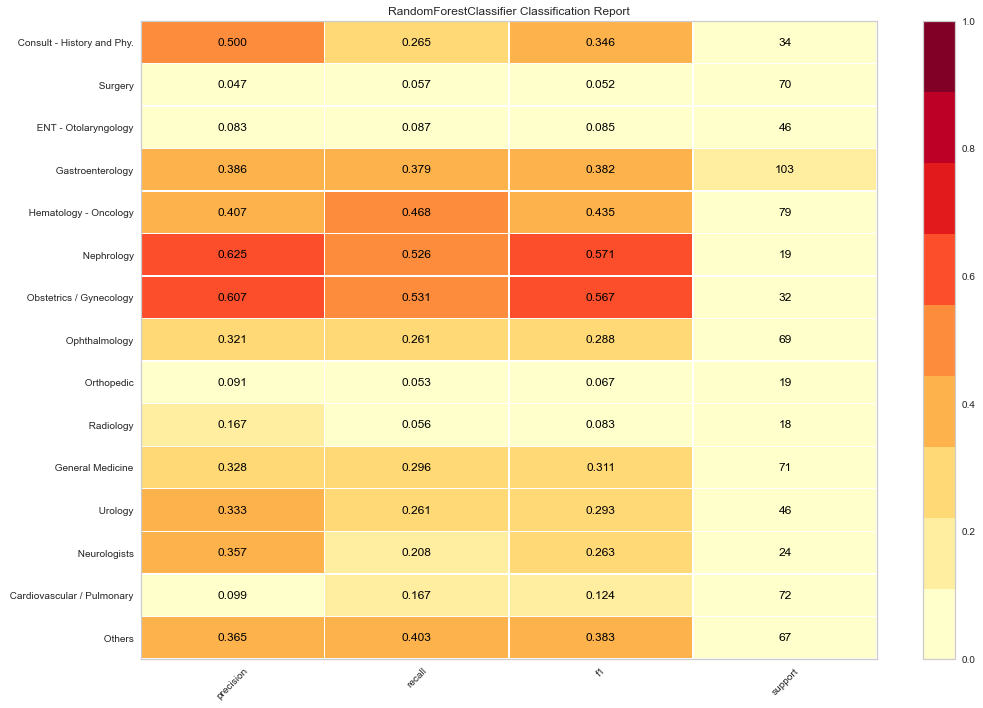

In [117]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(classifier, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_RANDOMFOREST_WITHREDUCTION.png")

In [118]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']
Actual Labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [119]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Consult - History and Phy.,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Surgery,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary


In [120]:
# Create the GridSearchCV model
# Create first pipeline for base without reducing features.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,40)),
    'classifier__max_features' : list(range(6,32,10))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
# Train the models with GridSearch
best_clf = clf.fit(train_tfIdf, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  3.9min finished


In [121]:
print(best_clf.best_params_)
print(best_clf.best_score_)

{'classifier': LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear'), 'classifier__C': 1.623776739188721, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.4007687399822598


In [122]:
# save your model by updating "your_name" with your name
import joblib
filename = 'random_forest_grid_search.joblib'
joblib.dump(best_clf, filename)

['random_forest_grid_search.joblib']

In [123]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.52      0.61      0.56        67
 Cardiovascular / Pulmonary       0.21      0.72      0.32        72
               Neurologists       0.00      0.00      0.00        24
                    Urology       0.61      0.43      0.51        46
           General Medicine       1.00      0.01      0.03        71
                  Radiology       0.00      0.00      0.00        18
                 Orthopedic       0.00      0.00      0.00        19
              Ophthalmology       0.46      0.38      0.41        69
    Obstetrics / Gynecology       0.64      0.22      0.33        32
                 Nephrology       0.75      0.16      0.26        19
      Hematology - Oncology       0.53      0.76      0.63        79
           Gastroenterology       0.39      0.32      0.35       103
       ENT - Otolaryngology       0.00      0.00      0.00        46
                    Surgery      

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

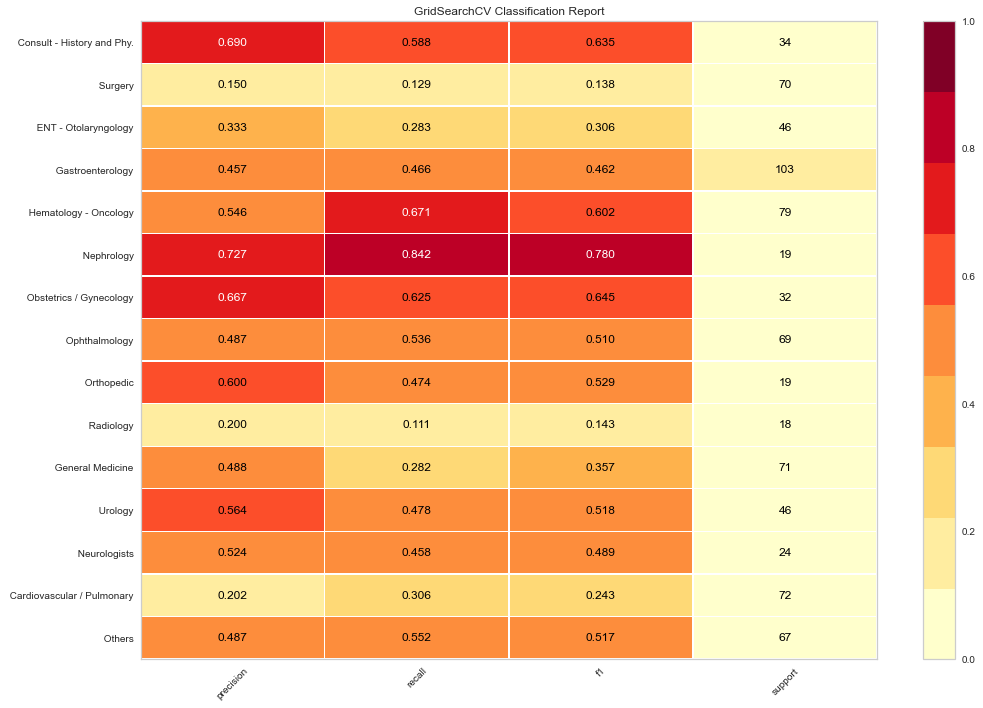

In [124]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(best_clf, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_GRIDSEARCH_WITHREDUCTION.png")

In [125]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [126]:
classifier.fit(train_tfIdf, y_train)

LogisticRegression()

In [127]:
print(f"Training Data Score: {classifier.score(train_tfIdf, y_train)}")
print(f"Testing Data Score: {classifier.score(test_tfIdf, y_test)}")

Training Data Score: 0.6644370122630993
Testing Data Score: 0.34850455136540964


In [128]:
predictions = classifier.predict(test_tfIdf)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists' ' Orthopedic'
 ' Surgery' ' Cardiovascular / Pulmonary']
First 10 Actual labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [129]:
pd.DataFrame({"Prediction": predictions[:10], "Actual": y_test[:10].tolist()}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Others,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Surgery,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary
